In [24]:
import matplotlib.pyplot as plt
import pandas as pd

## Predicting the Presidential Election popular vote

This project is going to study the percentage of the popular vote the Incumbent party secures since the 1952.

This is a Linear Regression problem, so we will also include an exploration and explanation of classical Linear Regression Techniques.

## What is Linear Regression?

"Linear regression is an approach to modeling the relationship between a scalar response and one or more explanatory variables."

-Wiki

### Simple Linear Regression

Simple Linear Regression is a model which uses one scalar response and one explanatory variable.

#### Oh, you only have the scalar response data?

Lets assume you're a waiter who only recorded the amount you got tipped (scalar response), and you wanted to predict how much your next tip would be. 

The best predictor with this amount of data would be the mean, the variability in the tip amounts can only be explained by the tips themselves.

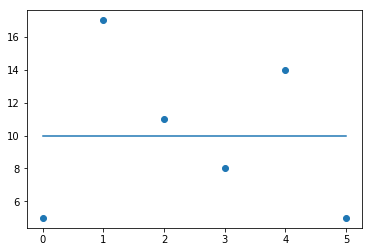

In [36]:
data = {'tips': [5, 17, 11, 8, 14, 5]}

df = pd.DataFrame(data)
df['mean_baseline'] = df['tips'].values.mean()

#plot
plt.scatter(df.index, df['tips'])
plt.plot(df.index, df['mean_baseline'])
plt.show()

#### How good was our model?

This is found by looking at the residuals or errors graphed below,

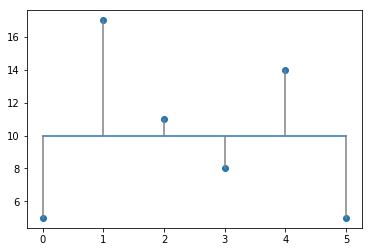

In [37]:
plt.scatter(df.index, df['tips'])
plt.plot(df.index, df['mean_baseline'])
for x, y1, y2 in zip(df.index, df['tips'], df['mean_baseline']):
        plt.plot((x, x), (y1, y2), color='grey')
plt.show()

#### Analyzing errors

When analyzing the errors of our model, we square them. The error is calculated by finding the difference between our predictive model and the actual value. 

The reason we square our errors is in order to punish larger deviations more so than smaller ones.

We can then sum them up to find a nice single number that can quantify our model's perforamnce. This single number is called the Sum of Squared Errors (SSE).

In [41]:
df['error'] = df['tips'] - df['mean_baseline']
df['error sq'] = df['error'] ** 2
df

,tips,mean_baseline,error,error sq
0,5,10.0,-5.0,25.0
1,17,10.0,7.0,49.0
2,11,10.0,1.0,1.0
3,8,10.0,-2.0,4.0
4,14,10.0,4.0,16.0
5,5,10.0,-5.0,25.0


Minimizing error is what modeling is all about. So how do we make better models, and minimize error metrics like SSE?? We get more data.


#### Lets try more data

In [45]:
data = {
    'distance-traveled (mi)' : [89, 66, 78, 111, 44, 77, 90, 66, 109, 76],
    'time-traveled (hrs)' : [7, 5.4, 6.6, 7.4, 4.8, 6.4, 7, 5.6, 7.3, 6.4],
    'number_of_deliveries' : [4, 1, 3, 6, 1, 3, 3, 2, 5, 3],
    'gas_Price' : [3.84, 3.19, 3.78, 3.89, 3.57, 3.57, 3.03, 3.51, 3.54, 3.25]
}

df = pd.DataFrame(data)

In this example we added 2 independent variables or explanatory variables. This potentially allows for more accurate models.

##### Is more variables always better?

More is not always better, infact it can sometimes harm more than it helps. This is the process of overfitting, where a model is very good at predicting the data it models, but bad at predicting new data.

Another consideration is the relationship between the independent variables, some may effect each other. This is a problem because it makes it hard to pin-point which of the independent variables is the real mover of the dependent.

## The Ideal

The ideal is to have a group of explanatory variables that correlate with the dependent variable but do not correlate with each other.

For this we check 
* the relationships between each explanatory variables using scatterplots and correlations.
* the relationship between each individual explanatory variable and the dependent variable

#### Singling out each explanatory variable

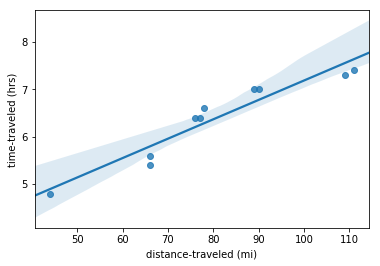

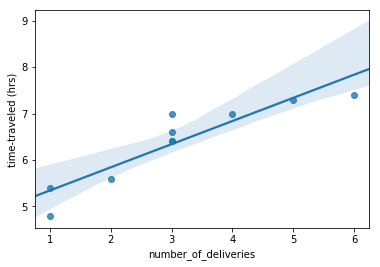

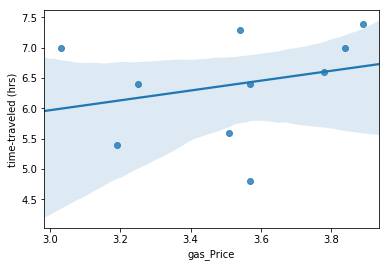

In [53]:
import seaborn as sns

target = 'time-traveled (hrs)'
explanatory_vars = ['distance-traveled (mi)',
                     'number_of_deliveries',
                     'gas_Price'
                    ]

for explanatory in explanatory_vars:
    sns.regplot(x = explanatory, y = target, data = df)
    plt.show()

We can see that gas_Price does not have a strong correlation with time-traveled. We should then take it out of our mulitple-regression model.

### Relationships between explanatory variables

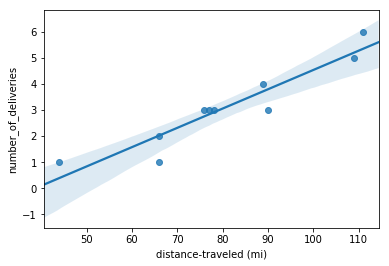

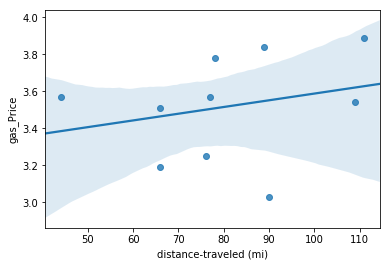

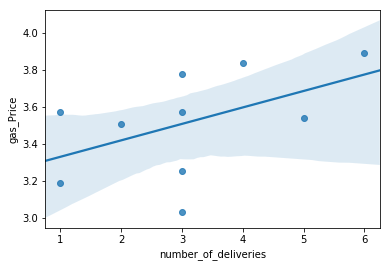

In [66]:
num_explan = len(explanatory_vars) - 1

x = 0
while (x < num_explan):
    y = x + 1
    while (y <= num_explan):
        sns.regplot(x = explanatory_vars[x], y = explanatory_vars[y], data=df)
        plt.show()
        y += 1
    x += 1

Here we found a problem. Number of deliveries appears to be highly coorelated with Miles traveled. This is multicollinearity, which means that these explanatory variables are redundant and should not both be used.